# Residuals and $R^2$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la
import pandas as pd

## Residuals

Let $(\mathbf{x}_1,y_1),\dots,(\mathbf{x}_N,y_N)$ be a data set of $N$ observations where each $\mathbf{x}_i = (x_{i,1},\dots,x_{i,p})$ is a vector of values of the independent variables $x_1,\dots,x_p$. Consider a linear regression model

$$
y = \beta_0 + \beta_1 x_1 + \cdots + \beta_p x_p + \varepsilon
$$

where $\varepsilon$ is the **residual**. Use the notation $\varepsilon_i$ for the residual of the $i$th observation in the data set:

$$
\varepsilon_i = y_i - (\beta_0 + \beta_1 x_{i,1} + \cdots + \beta_p x_{i,p})
$$

The parameters $\beta_0,\beta_1,\dots,\beta_p$ are computed to minimize the residual sum of squares

$$
RSS = \sum_{i = 1}^N \varepsilon_i^2
$$

Once we compute parameters $\beta_0,\dots,\beta_p$ which best fit the data, we would like to validate the model. We present two methods: the *coefficient of determination* $R^2$ (and $R^2_{adj}$) and *graphical regression diagnostics*.

## Coefficient of Determination $R^2$

The quantity $RSS$ measures the total error of the linear regression model but the value on its own does not tell us how well the model fits the data.  The **coefficient of determination** is given by 

$$
R^2 = 1 - \frac{\sum_{i=1}^N \varepsilon_i^2}{\sum_{i=1}^N (y_i - \bar{y})^2}
$$

The coefficient $R^2$ compares the error $RSS$ to the error of a model consisting of simply the mean value

$$
\bar{y} = \frac{1}{N} \sum_{i=1}^N y_i
$$

The value $R^2$ is near 1 when the model fits the data very closely and the value $R^2$ is near 0 when the linear regression model has nearly the same error as just simply drawing a straight horizontal line through the data. The definition of $R^2$ applies to any linear regression model however the value $RSS$ usually increases with the number of features $p$ in the model. Therefore we define the **adjusted** $R^2_{adj}$ coefficient as

$$
R^2_{adj} = 1 - \frac{N-1}{N-p-1}\frac{\sum_{i=1}^N \varepsilon_i^2}{\sum_{i=1}^N (y_i - \bar{y})^2}
$$

The coefficient $\frac{N-1}{N-p-1}$ takes into account the number of features in the model.

:::{seealso}
Check out [Wikipedia: Coefficient of Determination](https://en.wikipedia.org/wiki/Coefficient_of_determination) for more information.
:::

## Grapical Regression Diagnostics

The linear regression model is a good representation of the relationship between $y$ and $x_1,\dots,x_p$ if the residual $\varepsilon$ satisfies the following properties:

1. The residuals $\varepsilon_i$ are normally distributed with mean 0.
2. Distribution of residuals $\varepsilon_i$ does not depend on $x_1,\dots,x_p$
3. Distribution of residuals $\varepsilon_i$ does not depend on index $i$ (or time $t_i$)

We can verify these properties graphically by producing the following figures:

1. Plot histogram of residuals $\varepsilon_i$
2. Plot $\varepsilon_i$ versus $x_{i,j}$ for each feature $x_j$
3. Plot $\varepsilon_i$ versus index $i$ (or time $t_i$)

Plot 1 should be a familiar bell curve centered at 0, and plots 2 and 3 should be random scatter plots with mean 0 and constant variance in the horizontal direction.

:::{seealso}
Check out [Wikipedia: Regression Validation](https://en.wikipedia.org/wiki/Regression_validation) for more information.
:::

## Example: REALTOR.ca

The data below was taken from [REALTOR.ca](https://www.realtor.ca) for listings in the Kitsilano neighborhood of Vancouver. The variables $x_1,x_2,x_3$ correspond to the size (in square feet, sqft), the number of bedrooms and the number of bathrooms respectively. The dependent variable $y$ is the listing price.

In [2]:
x1 = np.array([1050,943,1557,662,829,724,482,702,733,637,819,802,771,779,823,924,1088,1018])
x2 = np.array([2,2,2,1,2,1,1,1,2,1,2,2,1,2,2,2,2,2])
x3 = np.array([2,2,2,1,2,1,1,1,1,1,1,1,1,2,2,2,2,2])
y  = np.array([1.39,1.079,1.398,0.859,1.098,0.619,0.625,0.639,0.728888,0.778,0.749888,0.825,0.858,0.899,0.8999,0.999888,1.099,1.149])

Let's construct different linear regression models and compare the $R^2$ and $R^2_{adj}$ values. We'll start with the model which includes only the size

$$
y = \beta_0 + \beta_1 x_1 + \varepsilon
$$

Compute parameters $\beta_0,\beta_1$ and plot the result.

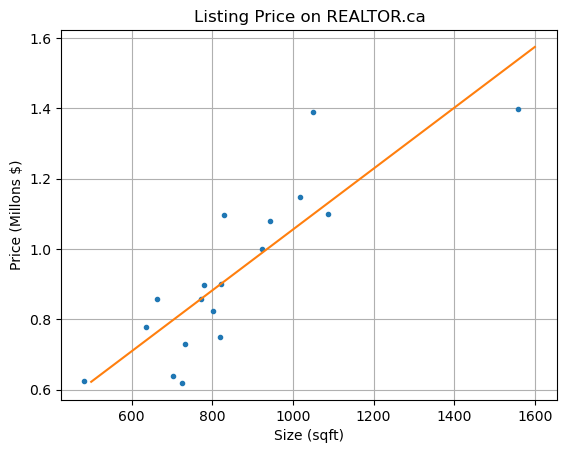

In [3]:
N = len(y)
X = np.column_stack([np.ones(N),x1])
beta = la.solve(X.T@X,X.T@y)
x1s = np.linspace(500,1600,50)
ys = beta[0] + beta[1]*x1s

plt.plot(x1,y,'.')
plt.plot(x1s,ys)
plt.title('Listing Price on REALTOR.ca')
plt.xlabel('Size (sqft)'), plt.ylabel('Price (Millons $)'), plt.grid(True)
plt.show()

Compute residuals and coefficient $R^2$.

In [4]:
residuals = y - (beta[0] + beta[1]*x1)
yhat = np.mean(y)
R2x1 = 1 - np.sum(residuals**2)/np.sum((y - yhat)**2)
print('R2 =',R2x1)

R2 = 0.7235562224127696


Repeat the procedure for the linear regression model $y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \varepsilon$.

In [5]:
X = np.column_stack([np.ones(N),x1,x2])
beta = la.solve(X.T@X,X.T@y)
residuals = y - (beta[0] + beta[1]*x1 + beta[2]*x2)
R2x1x2 = 1 - np.sum(residuals**2)/np.sum((y - yhat)**2)
R2adjx1x2 = 1 - (1 - R2x1x2)*(N - 1)/(N - 2 - 1)
print('R2 =',R2x1x2,'R2adj =',R2adjx1x2)

R2 = 0.7400376017871558 R2adj = 0.70537594869211


Repeat the procedure again for the linear regression model $y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_3 + \varepsilon$.

In [6]:
X = np.column_stack([np.ones(N),x1,x2,x3])
beta = la.solve(X.T@X,X.T@y)
residuals = y - (beta[0] + beta[1]*x1 + beta[2]*x2 + beta[3]*x3)
R2x1x2x3 = 1 - np.sum(residuals**2)/np.sum((y - yhat)**2)
R2adjx1x2x3 = 1 - (1 - R2x1x2x3)*(N - 1)/(N - 3 - 1)
print('R2 =',R2x1x2x3,'R2adj =',R2adjx1x2x3)

R2 = 0.8302699983155556 R2adj = 0.793899283668889


The coefficient of determination increases when we include the number of bedrooms and bathrooms!

## Example: Temperature

Let's again look at daily average temperature in Vancouver (see [vancouver.weatherstats.ca](https://vancouver.weatherstats.ca)).

In [7]:
df = pd.read_csv('temperature.csv')

In [8]:
df.head()

,day,month,year,dayofyear,avg_temperature
0,13,4,2023,103,7.10
1,12,4,2023,102,5.19
2,11,4,2023,101,8.00
3,10,4,2023,100,7.69
4,9,4,2023,99,9.30


Let $T$ be the temperature and let $d$ be the day of the year. Define a regression model of the form

$$
T = \beta_0 + \beta_1 \cos(2 \pi d/365) + \beta_2 \sin(2 \pi d/365)
$$

Note that if we rewrite the variables as $y = T$, $x_1 = \cos(2 \pi d/365)$ and $x_2 = \sin(2 \pi d/365)$ then we see that this is indeed a linear regression model

$$
y = \beta_0 + \beta_1 x_1 + \beta_2 x_2
$$

Construct the corresponding data matrix $X$ and compute the coefficient vector $\boldsymbol{\beta}$.

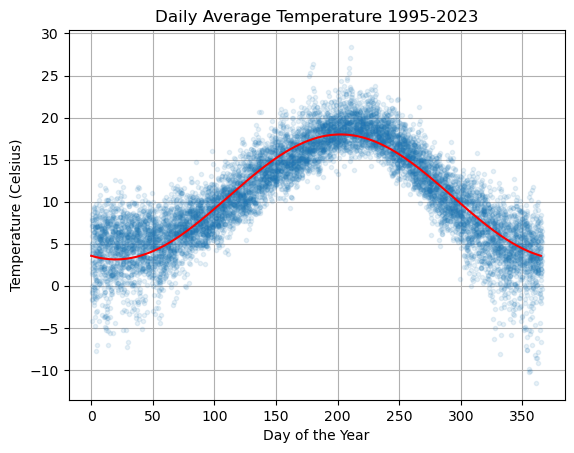

In [9]:
N = len(df)
d = df['dayofyear']
T = df['avg_temperature']
X = np.column_stack([np.ones(N),np.cos(2*np.pi*d/365),np.sin(2*np.pi*d/365)])
beta = la.solve(X.T@X,X.T@T)

ds = np.linspace(0,365,500)
x1 = np.cos(2*np.pi*ds/365)
x2 = np.sin(2*np.pi*ds/365)
Ts = beta[0] + beta[1]*x1 + beta[2]*x2

plt.plot(df['dayofyear'],df['avg_temperature'],'.',alpha=0.1,lw=0)
plt.plot(ds,Ts,'r'), plt.grid(True)

plt.title('Daily Average Temperature 1995-2023')
plt.xlabel('Day of the Year'), plt.ylabel('Temperature (Celsius)')
plt.show()

Compute the residuals and plot the distribution:

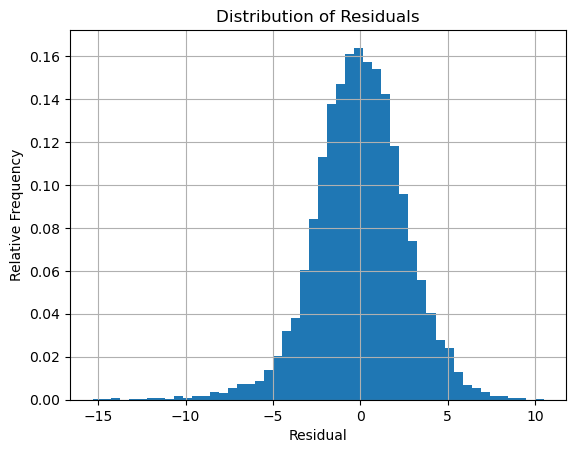

In [10]:
f = lambda d,beta: beta[0] + beta[1]*np.cos(2*np.pi*d/365) + beta[2]*np.sin(2*np.pi*d/365)
residuals = T - f(d,beta)
plt.hist(residuals,bins=50,density=True), plt.grid(True)
plt.title('Distribution of Residuals')
plt.xlabel('Residual'), plt.ylabel('Relative Frequency')
plt.show()

The distribution definitely looks like a normal distribution. Compute the mean and variance:

In [11]:
mean = np.mean(residuals)
var = np.var(residuals)
print('mean =',mean,', variance =',var)

mean = 3.8932057577767407e-14 , variance = 6.77316778296034


Compute the coefficients $R^2$ and $R^2_{adj}$:

In [12]:
That = np.mean(T)
R2 = 1 - np.sum(residuals**2)/np.sum((T - That)**2)
R2adj = 1 - (N-1)/(N-2-1)*np.sum(residuals**2)/np.sum((T - That)**2)
print('R2 =',R2,'R2adj =',R2adj)

R2 = 0.8035962434723157 R2adj = 0.8035569509332485


Next, let's plot the residuals $\varepsilon_i$ versus each of the input variables $x_1$ and $x_2$.

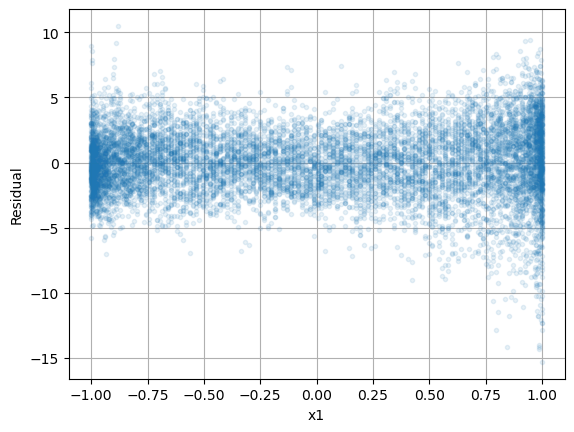

In [14]:
plt.plot(np.cos(2*np.pi*d/365),residuals,'.',alpha=0.1), plt.grid(True)
plt.xlabel('x1'), plt.ylabel('Residual')
plt.show()

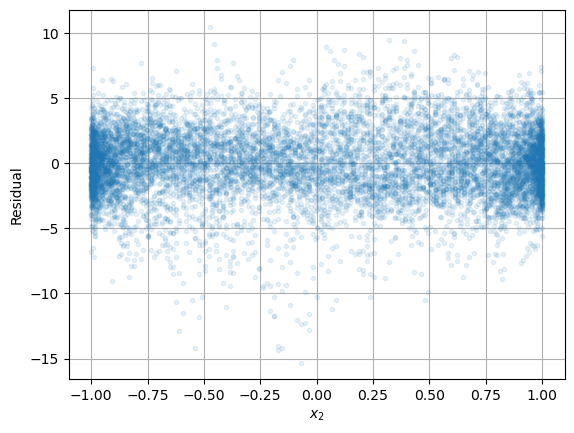

In [15]:
plt.plot(np.sin(2*np.pi*d/365),residuals,'.',alpha=0.1), plt.grid(True)
plt.xlabel('$x_2$'), plt.ylabel('Residual')
plt.show()

Both plots suggest that there is not much variation with respect to $x_1$ and $x_2$.

Now let's plot $\varepsilon_i$ versus day of the year $d$.

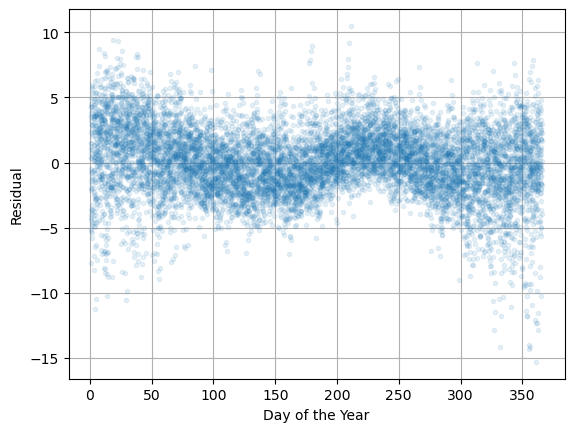

In [16]:
plt.plot(d,residuals,'.',alpha=0.1), plt.grid(True)
plt.xlabel('Day of the Year'), plt.ylabel('Residual')
plt.show()

We can see there is some variation in the error! This means that our model is missing something. It looks like there is a variation with period 6 months. Let's build that into the model!

## Example: Temperature with Biannual Variation

We can see in the previous example that the linear model doesn't quite fit the data. Let's modify our linear regression model to include periodic functions with periods of 1 year (365 days) and 6 months (365/2 days):

$$
T = \beta_0 + \beta_1 \cos(2 \pi d/365) + \beta_2 \sin(2 \pi d/365) + \beta_3 \cos(4 \pi d/365) + \beta_4 \sin(4 \pi d/365)
$$

Construct the corresponding data matrix $X$ and compute the coefficient vector $\boldsymbol{\beta}$.

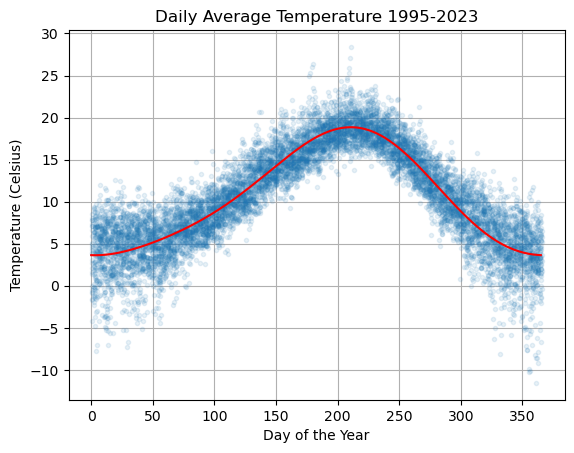

In [17]:
N = len(df)
d = df['dayofyear']
T = df['avg_temperature']
X = np.column_stack([np.ones(N),
                     np.cos(2*np.pi*d/365),np.sin(2*np.pi*d/365),
                     np.cos(4*np.pi*d/365),np.sin(4*np.pi*d/365)])
beta = la.solve(X.T@X,X.T@T)

ds = np.linspace(0,365,500)
x1 = np.cos(2*np.pi*ds/365)
x2 = np.sin(2*np.pi*ds/365)
x3 = np.cos(4*np.pi*ds/365)
x4 = np.sin(4*np.pi*ds/365)
Ts = beta[0] + beta[1]*x1 + beta[2]*x2 + beta[3]*x3 + beta[4]*x4

plt.plot(df['dayofyear'],df['avg_temperature'],'.',alpha=0.1,lw=0)
plt.plot(ds,Ts,'r'), plt.grid(True)
plt.title('Daily Average Temperature 1995-2023')
plt.xlabel('Day of the Year'), plt.ylabel('Temperature (Celsius)')
plt.show()

Analyze the model. Plot the distribution of residuals:

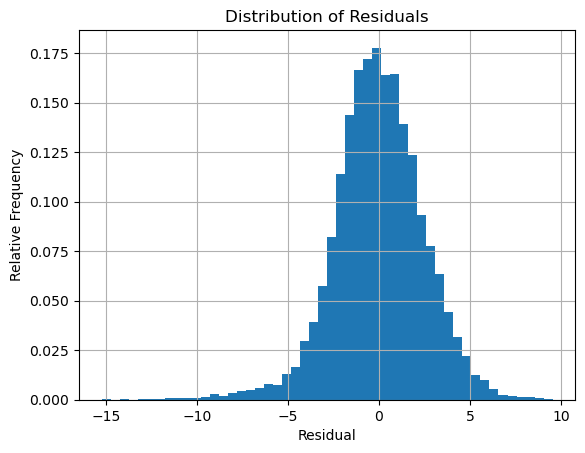

In [18]:
f = lambda d,beta: beta[0] + beta[1]*np.cos(2*np.pi*d/365) + beta[2]*np.sin(2*np.pi*d/365) + beta[3]*np.cos(4*np.pi*d/365) + beta[4]*np.sin(4*np.pi*d/365)
residuals = T - f(d,beta)
plt.hist(residuals,bins=50,density=True), plt.grid(True)
plt.title('Distribution of Residuals')
plt.xlabel('Residual'), plt.ylabel('Relative Frequency')
plt.show()

The distribution definitely looks like a normal distribution. Compute the mean and variance:

In [19]:
mean = np.mean(residuals)
var = np.var(residuals)
print('mean =',mean,', variance =',var)

mean = 4.063451797264861e-14 , variance = 6.2010510617861225


Compute the coefficients $R^2$ and $R^2_{adj}$:

In [20]:
That = np.mean(T)
R2 = 1 - np.sum(residuals**2)/np.sum((T - That)**2)
R2adj = 1 - (N-1)/(N-4-1)*np.sum(residuals**2)/np.sum((T - That)**2)
print('R2 =',R2,'R2adj =',R2adj)

R2 = 0.8201860987382082 R2adj = 0.8201141371969329


The coefficients both increase when we include the variables $x_3,x_4$.

Next, let's plot the residuals $\varepsilon_i$ versus each of the input variables $x_1,x_2,x_3,x_4$.

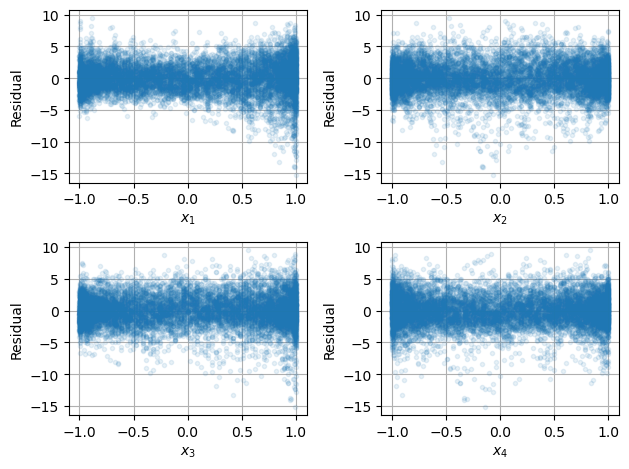

In [21]:
plt.subplot(2,2,1)
plt.plot(np.cos(2*np.pi*d/365),residuals,'.',alpha=0.1), plt.grid(True)
plt.xlabel('$x_1$'), plt.ylabel('Residual')

plt.subplot(2,2,2)
plt.plot(np.sin(2*np.pi*d/365),residuals,'.',alpha=0.1), plt.grid(True)
plt.xlabel('$x_2$'), plt.ylabel('Residual')

plt.subplot(2,2,3)
plt.plot(np.cos(4*np.pi*d/365),residuals,'.',alpha=0.1), plt.grid(True)
plt.xlabel('$x_3$'), plt.ylabel('Residual')

plt.subplot(2,2,4)
plt.plot(np.sin(4*np.pi*d/365),residuals,'.',alpha=0.1), plt.grid(True)
plt.xlabel('$x_4$'), plt.ylabel('Residual')

plt.tight_layout()
plt.show()

Finally, plot $\varepsilon_i$ versus day of the year $d$.

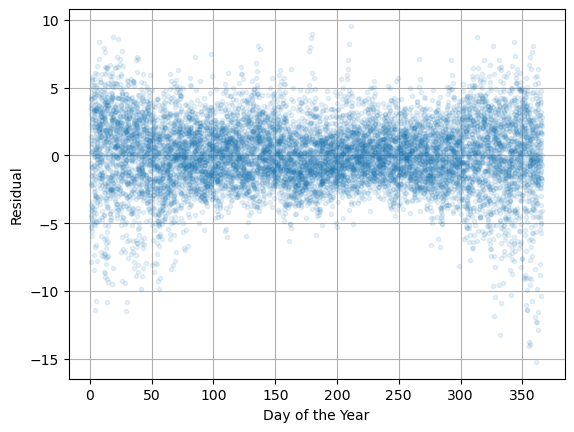

In [22]:
plt.plot(d,residuals,'.',alpha=0.1), plt.grid(True)
plt.xlabel('Day of the Year'), plt.ylabel('Residual')
plt.show()

All the plots suggest the mean of the residual is 0 independent of each variable and time however the variance seems to increase in the winter. How can we account for this?